In [140]:
import pandas as pd
import os
import glob
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Markdown

from metadata.etfs import etfs_large, etfs_small
from utils.conn_data import load_pickle

plt.style.use('seaborn')

In [141]:
outputs_path = os.path.join(os.path.dirname(os.getcwd()), "src", "data", "outputs")
des = pd.read_csv(os.path.join(os.getcwd(), 'data', 'utils', 'fredmd_description.csv'), sep=';')

fs_methods = ["lasso", "multivariate-granger", "pairwise-granger", "var-lingam"]
etf_focus = None
stability_threshold = 0.8

## lasso

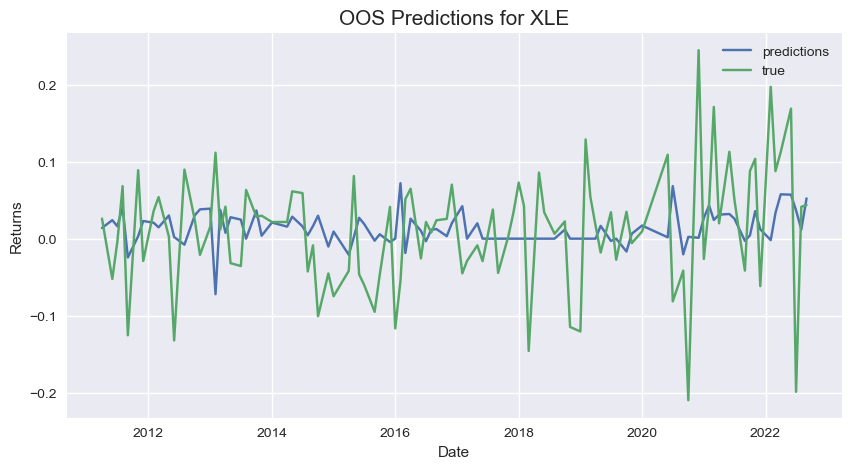

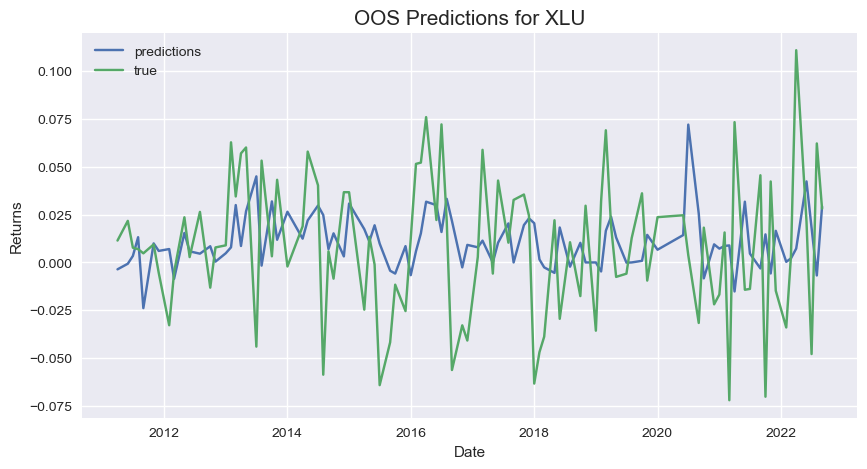

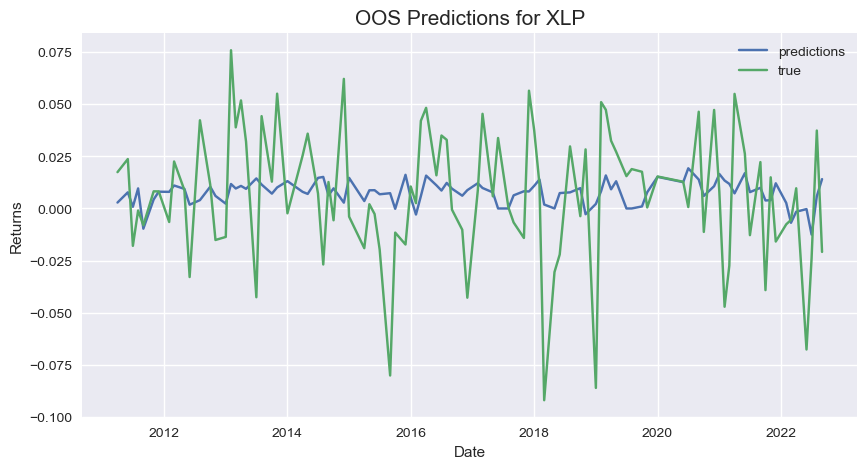

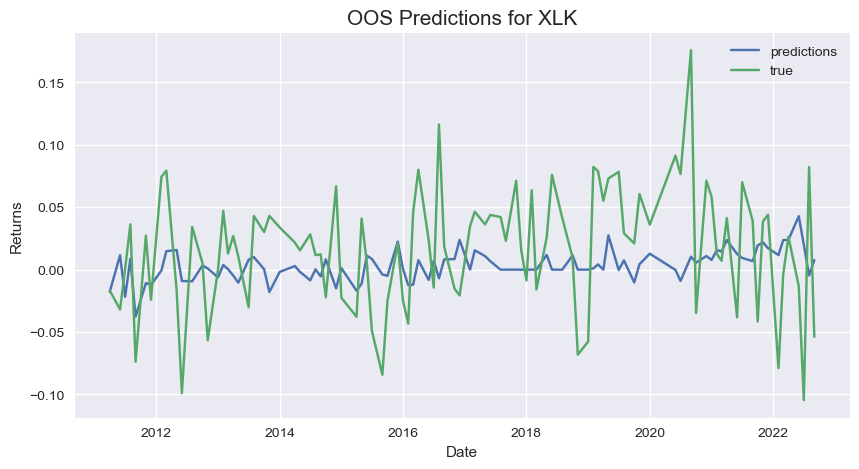

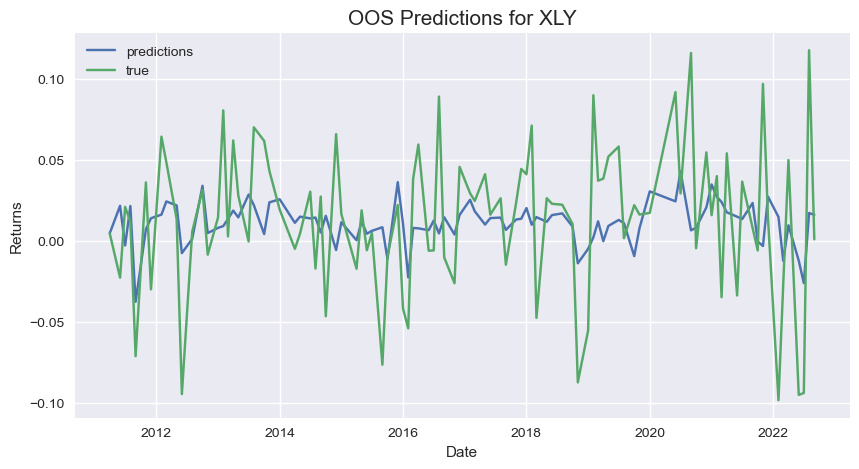

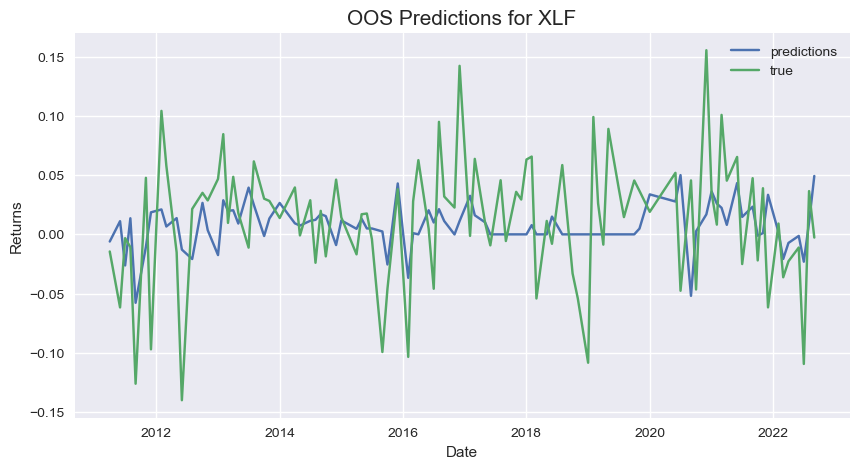

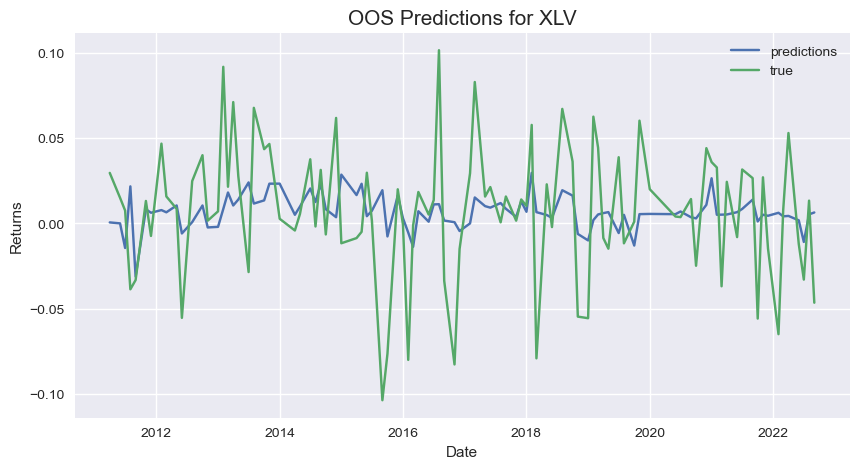

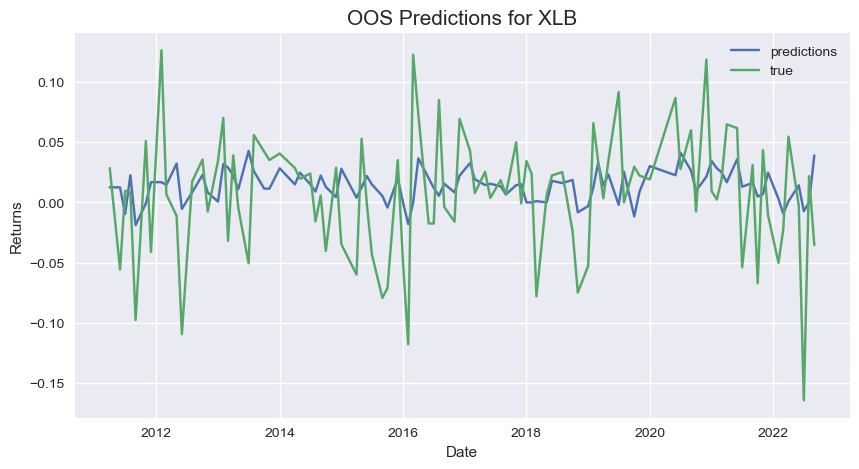

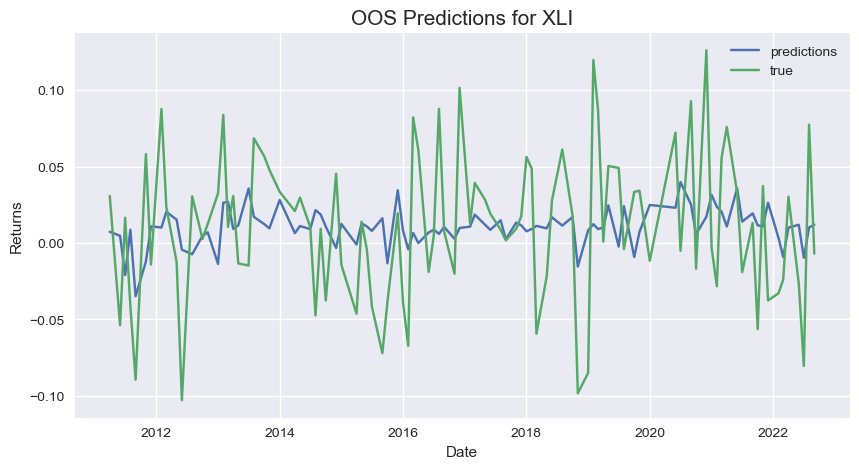

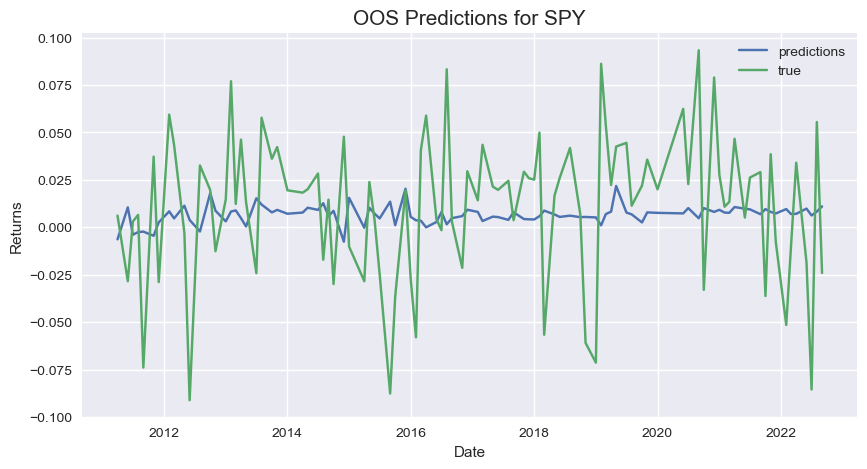

## multivariate-granger

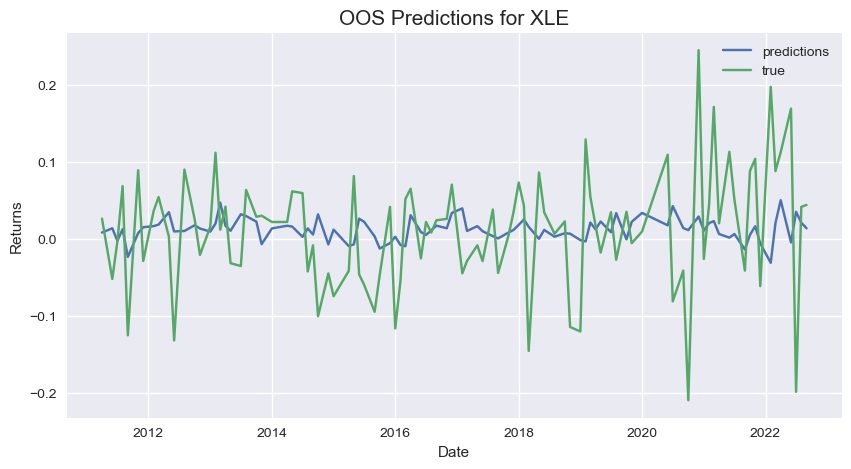

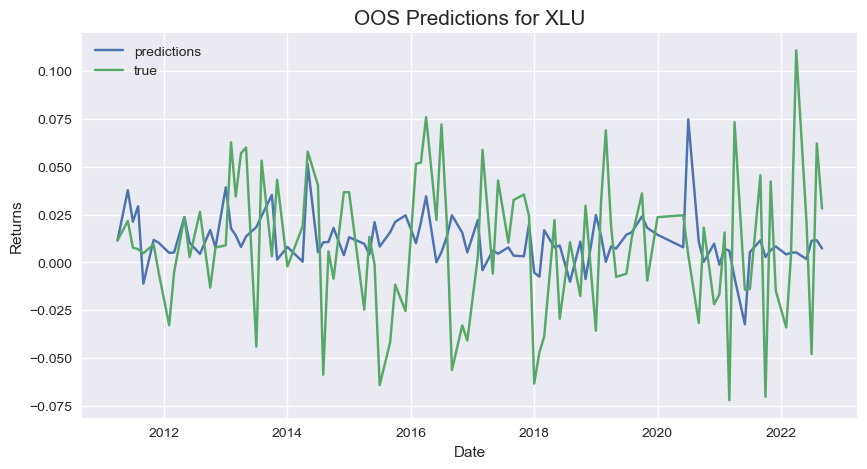

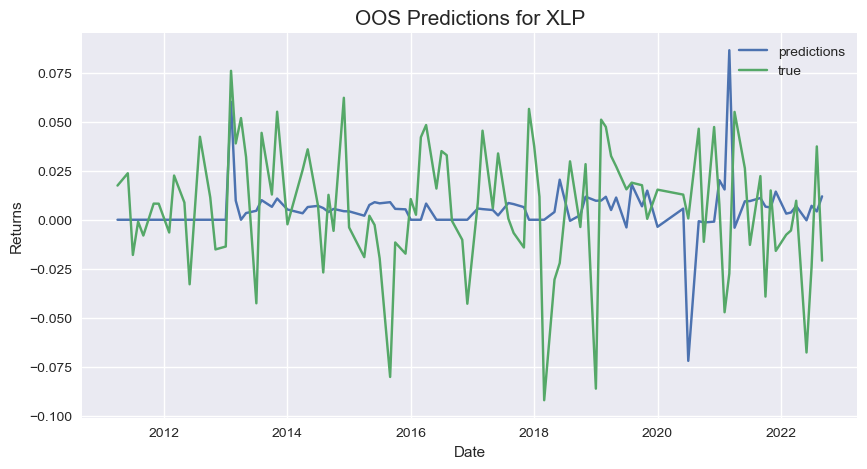

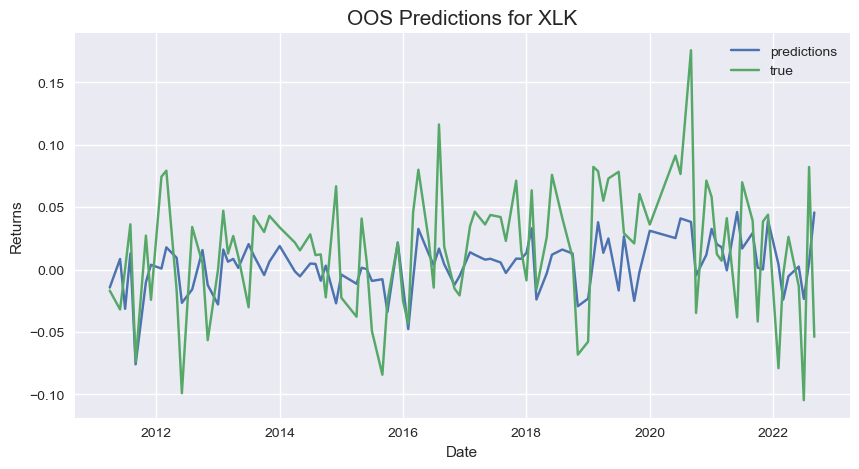

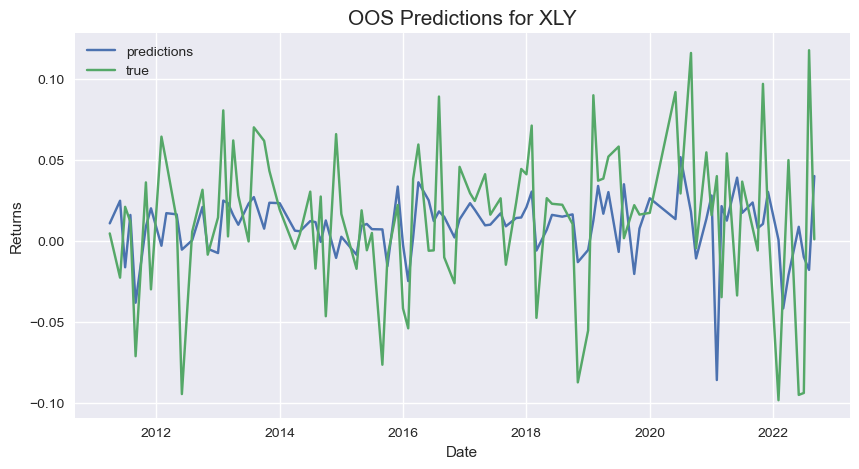

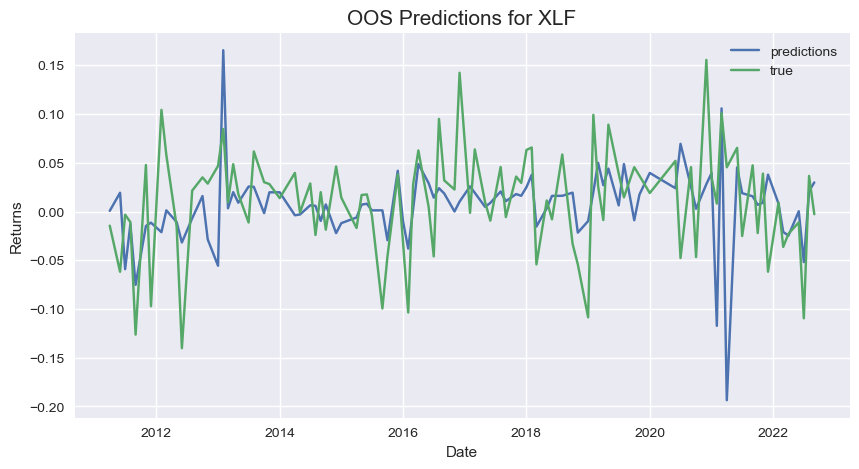

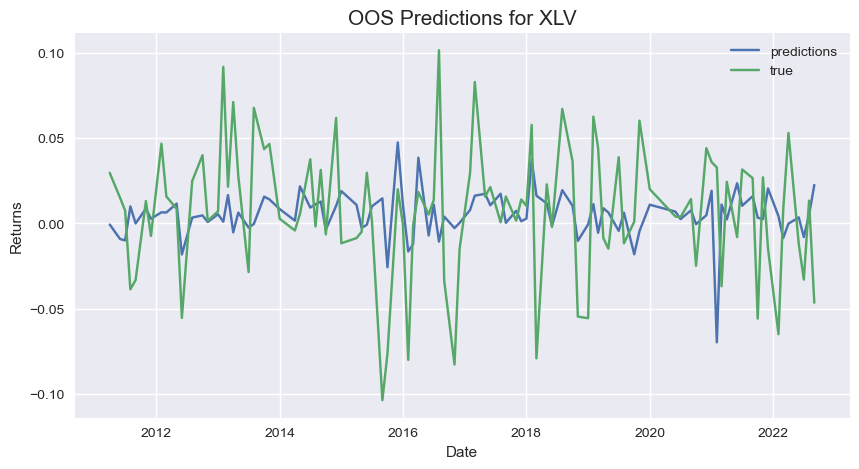

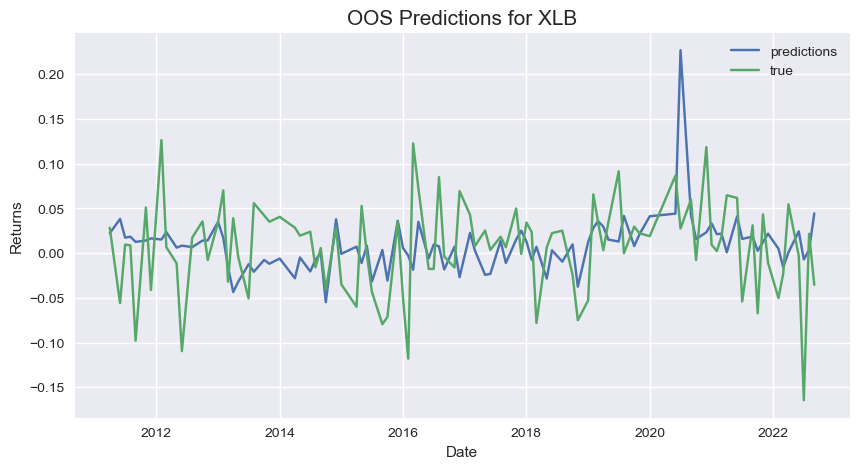

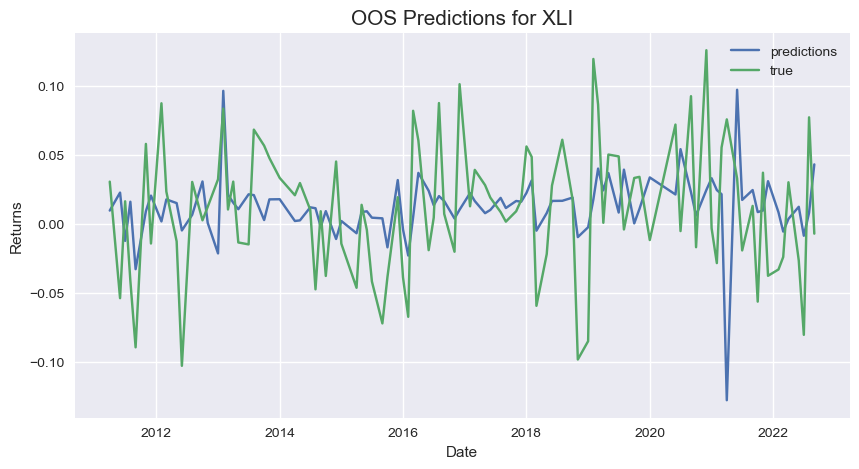

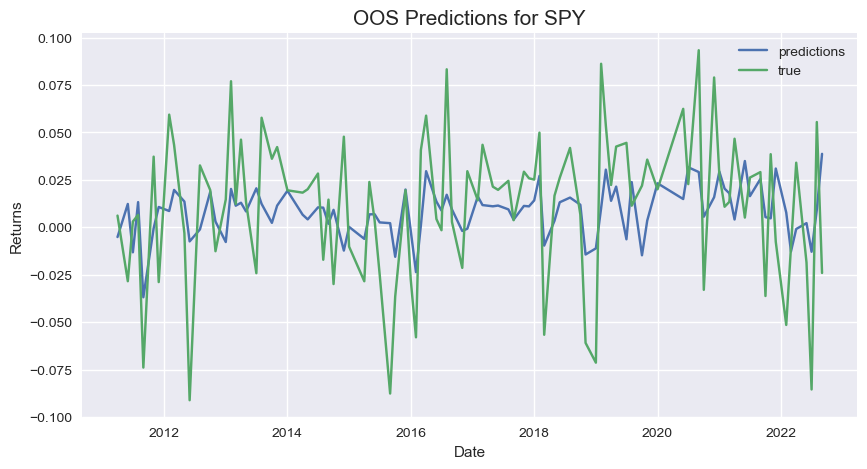

## pairwise-granger

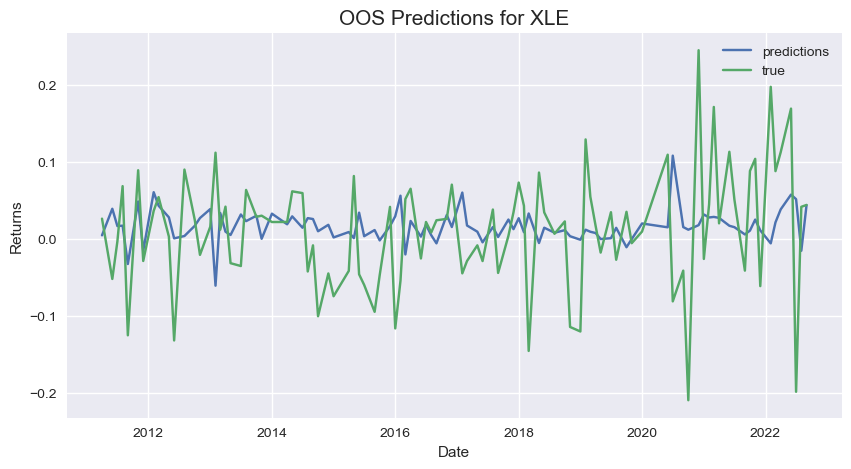

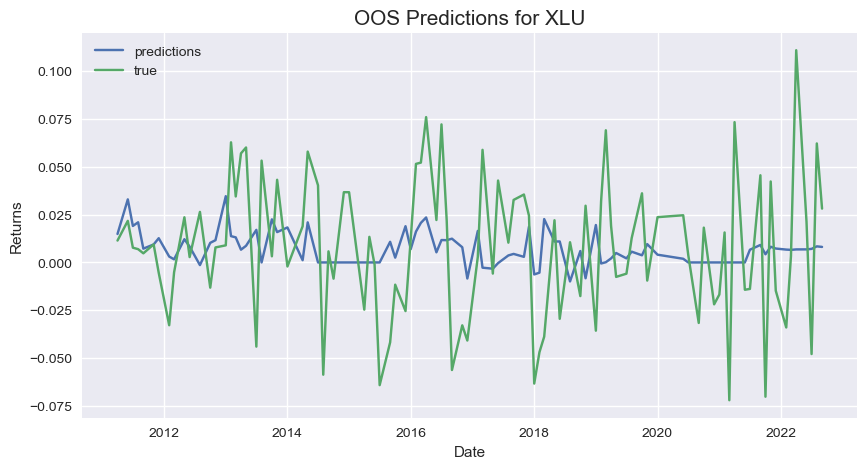

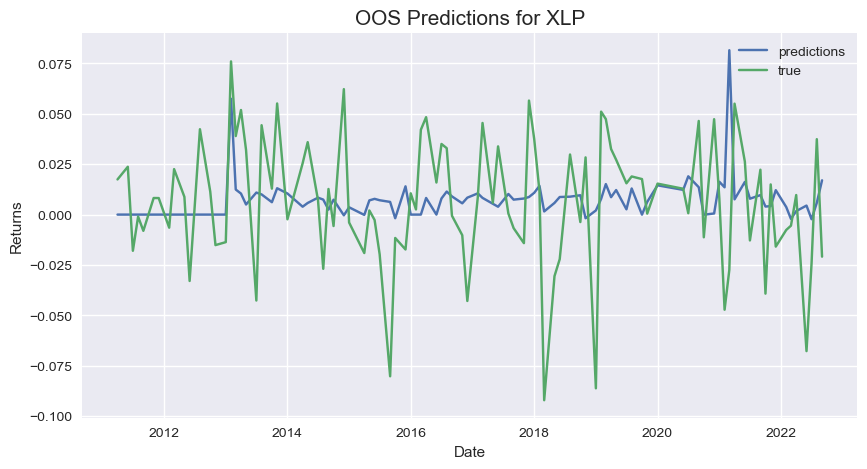

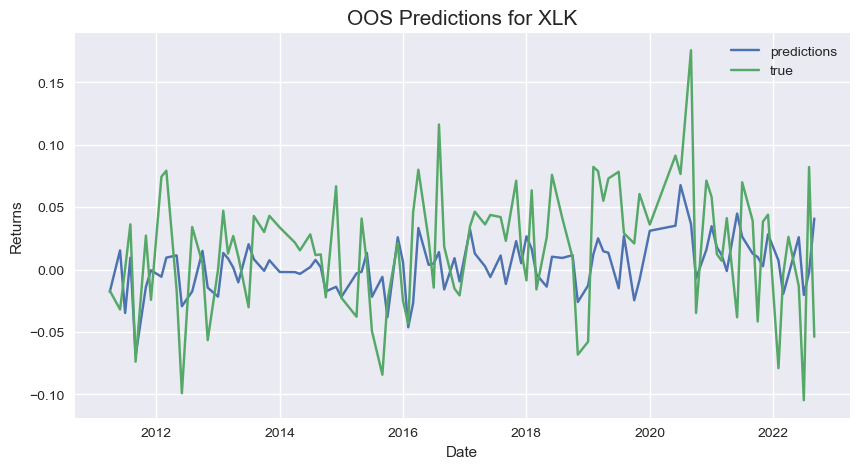

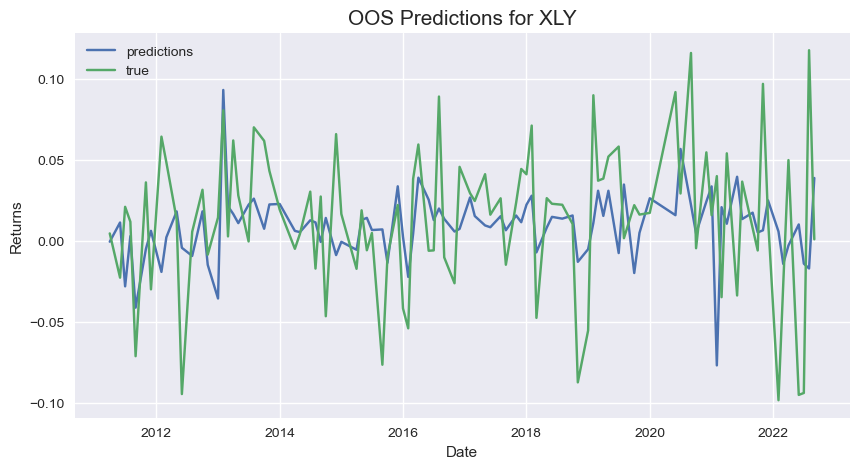

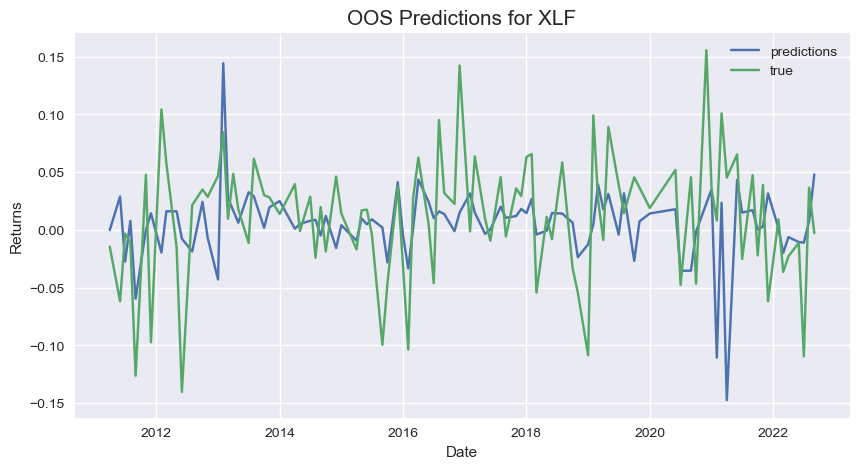

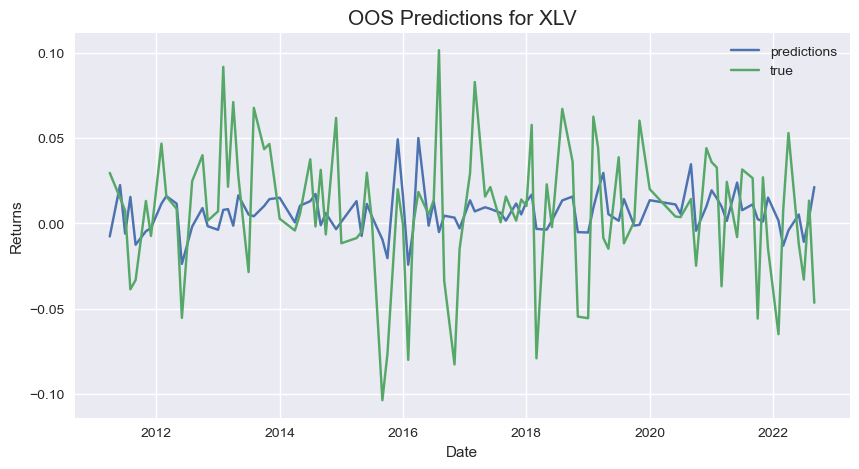

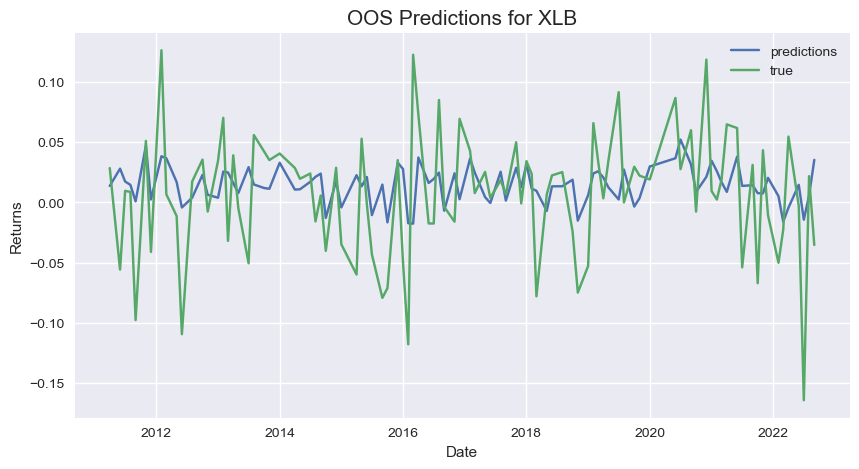

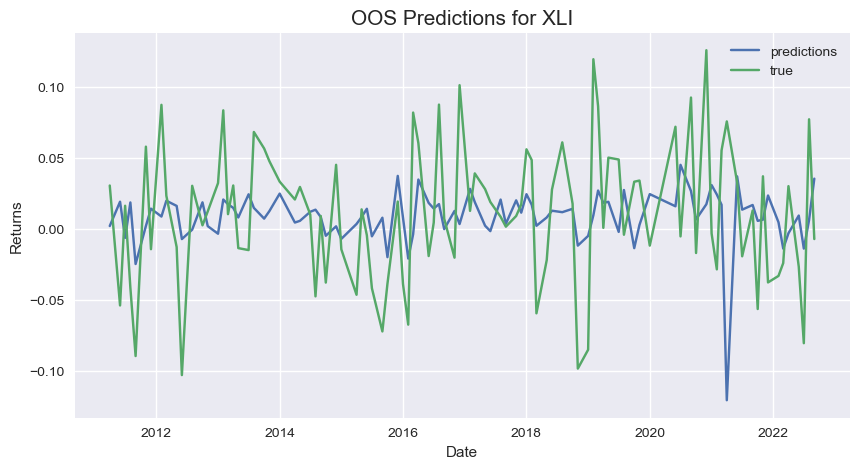

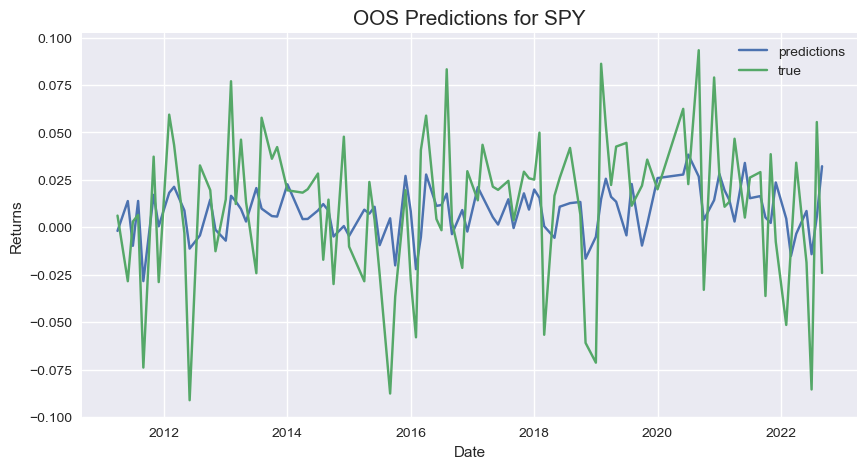

## var-lingam

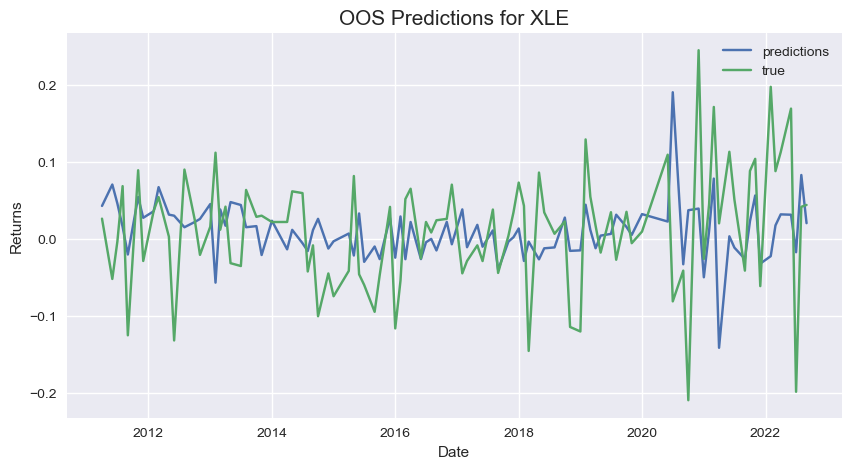

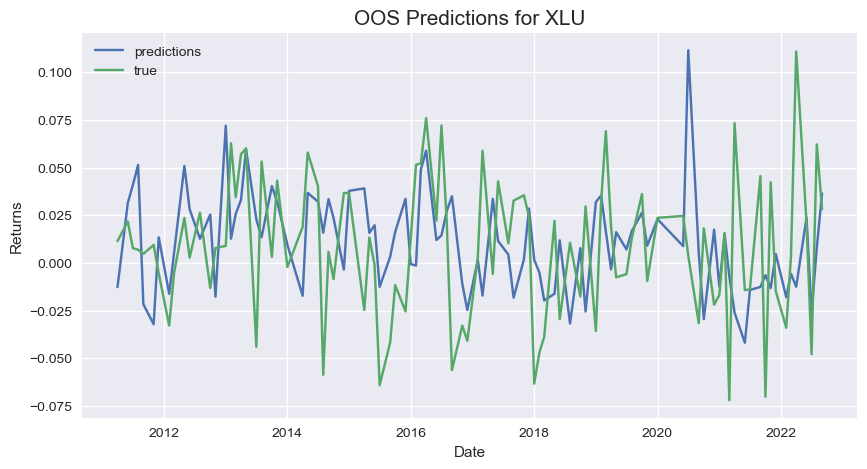

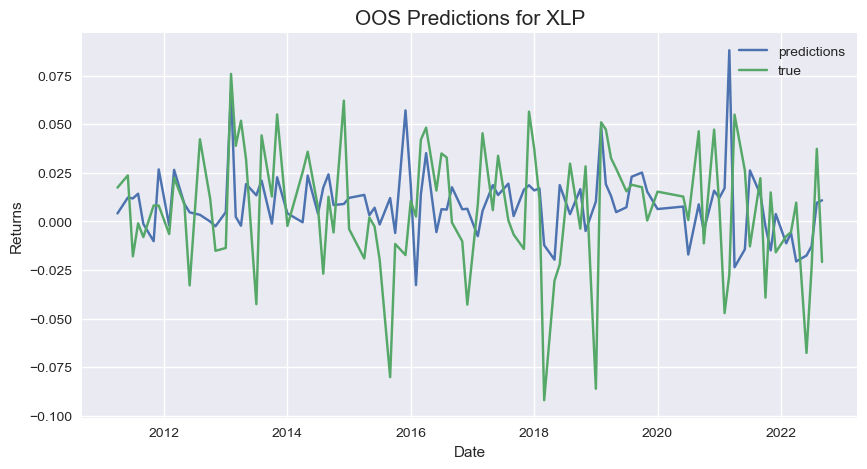

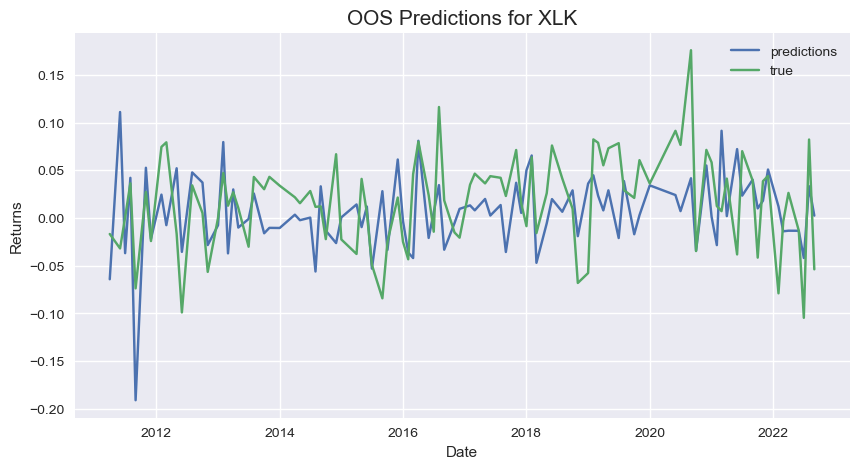

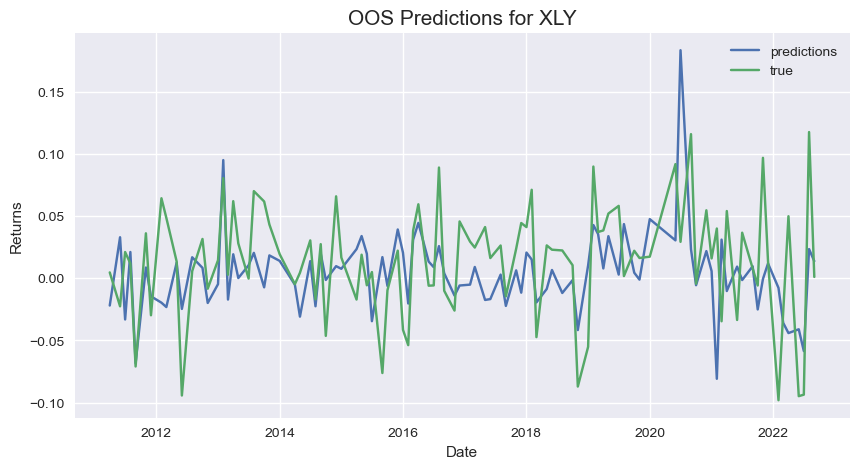

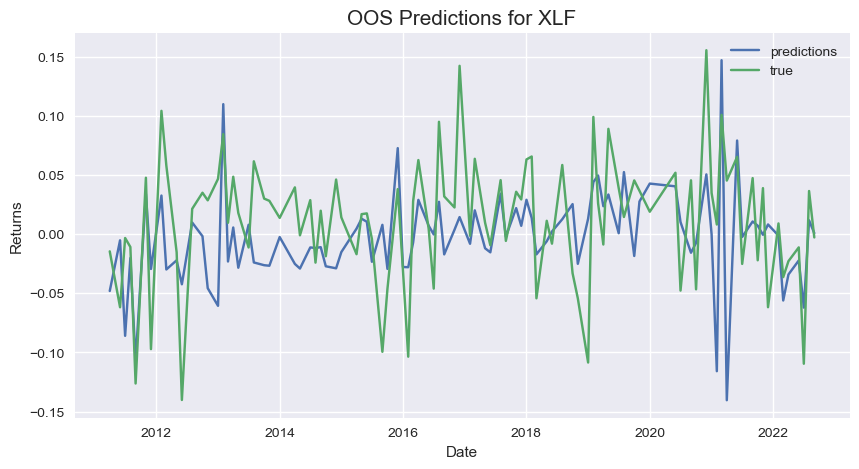

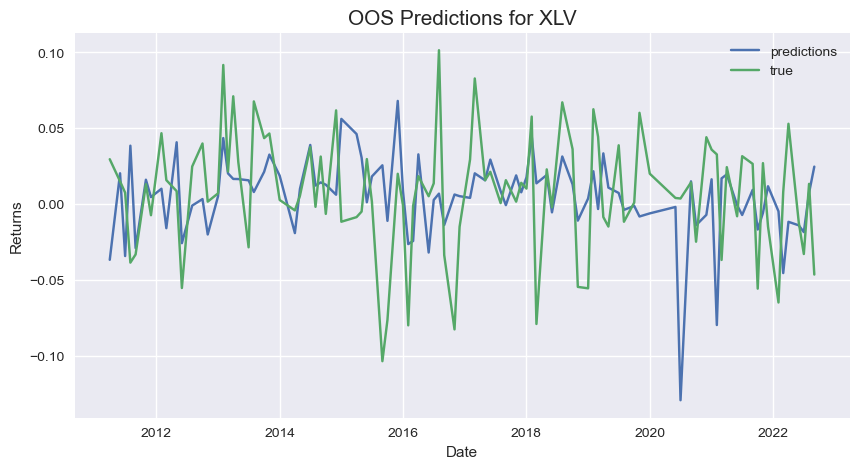

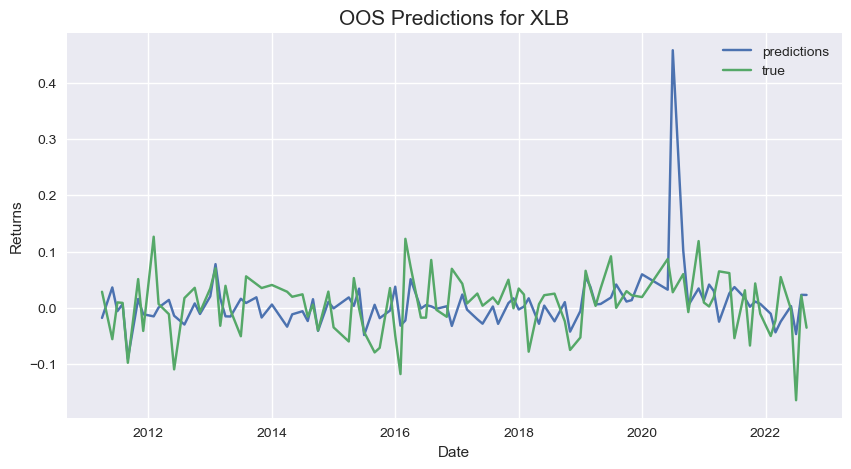

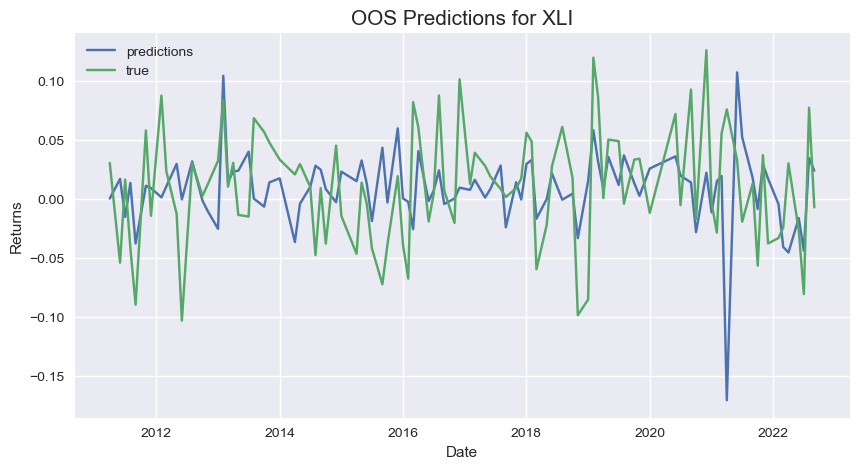

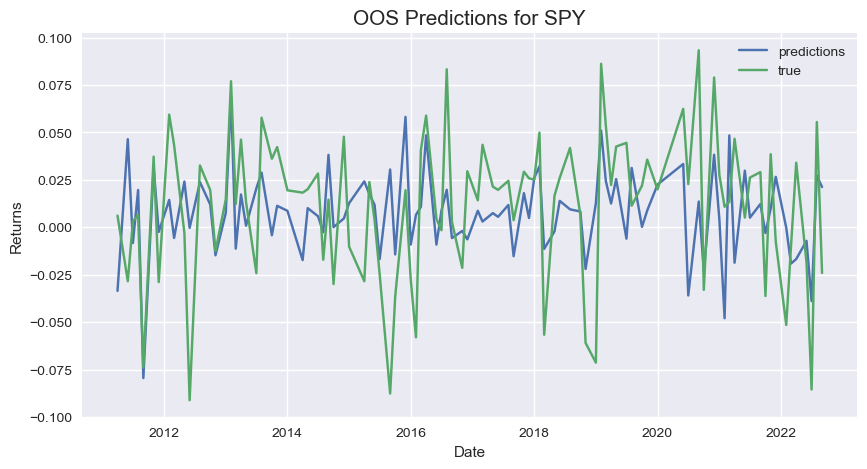

In [143]:
warnings.simplefilter("ignore")


all_metrics = []
all_stability = []
for fs in fs_methods:

    display(Markdown(f"## {fs}"))

    # list results files with glob
    results_files = glob.glob(os.path.join(outputs_path, fs, "*.pickle"))

    # load results files
    stability = []
    metrics = []
    for file in results_files:
        etf = file.split(fs)[-1].split("/")[-1].split("_")[0]

        if (etf_focus != etf) and (etf_focus is not None):
            continue
        else:
            pass

        obj = load_pickle(path=file)

        # plot predictions
        predictions_df = obj['predictions']
        predictions_2020_df = predictions_df.loc["2020-01-01":"2020-12-01"]
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_title(label=f'OOS Predictions for {etf}', fontsize=15)
        ax.plot(pd.to_datetime(predictions_df.index), predictions_df["prediction"], label="predictions")
        ax.plot(pd.to_datetime(predictions_df.index), predictions_df["true"], label="true")
        plt.xlabel("Date")
        plt.ylabel("Returns")
        plt.legend(loc='best', fontsize=10)   
        plt.show()

        # compute forecast metrics
        mse = mean_squared_error(predictions_df["true"], predictions_df["prediction"])
        mae = mean_absolute_error(predictions_df["true"], predictions_df["prediction"])
        mse_2020 = mean_squared_error(predictions_2020_df["true"], predictions_2020_df["prediction"])
        mae_2020 = mean_absolute_error(predictions_2020_df["true"], predictions_2020_df["prediction"])

        # compute cluster stability metrics
        parents_of_target_df = obj["parents_of_target"]
        tot = len(parents_of_target_df["date"].unique())
        stability_df = (parents_of_target_df.fillna(0).groupby(["cluster"]).sum()[["value"]] / tot).sort_values(by="value", ascending=False)
        stability_df = pd.concat({etf: stability_df}, names=['etf'])
        stability.append(stability_df)

        stability_measure = (stability_df > stability_threshold).sum().iloc[0] / stability_df.shape[0]
        metrics_df = pd.DataFrame({
            "fs": fs, 
            "etf": etf, 
            "mse": [mse],
            "mae": [mae], 
            "mse_2020": [mse_2020], 
            "mae_2020": [mae_2020],
            "stability": stability_measure})
        metrics.append(metrics_df)
    
    all_metrics.append(pd.concat(metrics).set_index(["fs", "etf"]))
    all_stability.append(pd.concat(stability))
all_metrics_df = pd.concat(all_metrics)

In [152]:
all_metrics_df.sort_values(by="mse", ascending=True)

mse       mae  mse_2020  mae_2020  stability
fs                   etf                                                   
lasso                XLP  0.000974  0.024158  0.000508  0.017575   0.600000
pairwise-granger     XLP  0.001067  0.024917  0.000622  0.018423   0.333333
var-lingam           XLP  0.001130  0.025506  0.000478  0.017905   1.000000
pairwise-granger     SPY  0.001194  0.028036  0.001909  0.037386   0.800000
multivariate-granger SPY  0.001194  0.027650  0.001991  0.037589   0.250000
                     XLP  0.001208  0.026647  0.001725  0.034024   0.000000
var-lingam           SPY  0.001283  0.028643  0.002069  0.036755   1.000000
pairwise-granger     XLU  0.001336  0.029799  0.000454  0.019630   0.333333
lasso                XLV  0.001377  0.027758  0.000368  0.015123   0.000000
pairwise-granger     XLV  0.001385  0.028727  0.000350  0.015099   0.500000
multivariate-granger XLU  0.001480  0.031411  0.001420  0.031473   0.222222
lasso                SPY  0.001559  0.031379  0.003013  0.047109   0.125000
                     XLU  0.001579  0.031374  0.001664  0.035070   0.545455
multivariate-granger XLV  0.001581  0.030043  0.000379  0.013893   0.000000
var-lingam           XLU  0.001682  0.032259  0.002838  0.041365   1.000000
lasso                XLY  0.001803  0.032345  0.003034  0.041747   0.000000
var-lingam           XLV  0.001884  0.032832  0.003523  0.037973   1.000000
multivariate-granger XLK  0.001988  0.035577  0.004835  0.055589   0.500000
pairwise-granger     XLY  0.002059  0.034751  0.002736  0.040969   0.571429
multivariate-granger XLY  0.002070  0.034584  0.003015  0.042565   0.400000
pairwise-granger     XLK  0.002122  0.037354  0.004411  0.048708   0.833333
var-lingam           XLY  0.002140  0.035739  0.006363  0.062115   1.000000
lasso                XLI  0.002214  0.038389  0.003781  0.054906   0.000000
pairwise-granger     XLB  0.002360  0.037039  0.002299  0.037921   0.800000
lasso                XLB  0.002414  0.038395  0.002551  0.039463   0.375000
multivariate-granger XLI  0.002457  0.039439  0.003968  0.058247   0.500000
pairwise-granger     XLI  0.002474  0.039555  0.003944  0.056787   0.600000
lasso                XLK  0.002664  0.042165  0.008149  0.077762   0.100000
var-lingam           XLK  0.002682  0.041276  0.004604  0.048248   1.000000
lasso                XLF  0.002702  0.040818  0.006923  0.070366   0.333333
var-lingam           XLI  0.002779  0.040121  0.003395  0.048636   1.000000
                     XLF  0.002792  0.041202  0.003397  0.049799   1.000000
pairwise-granger     XLF  0.003060  0.041862  0.004583  0.051616   0.666667
multivariate-granger XLB  0.003096  0.041965  0.008659  0.066711   0.111111
                     XLF  0.003110  0.040579  0.005674  0.060471   0.428571
var-lingam           XLB  0.004447  0.043544  0.033148  0.110603   1.000000
multivariate-granger XLE  0.006210  0.059410  0.020427  0.121848   0.250000
lasso                XLE  0.006401  0.060712  0.023087  0.123510   0.266667
pairwise-granger     XLE  0.006631  0.060956  0.024729  0.133075   0.076923
var-lingam           XLE  0.006785  0.061375  0.030781  0.140148   1.000000

In [153]:
all_metrics_df.sort_values(by="mae", ascending=True)

mse       mae  mse_2020  mae_2020  stability
fs                   etf                                                   
lasso                XLP  0.000974  0.024158  0.000508  0.017575   0.600000
pairwise-granger     XLP  0.001067  0.024917  0.000622  0.018423   0.333333
var-lingam           XLP  0.001130  0.025506  0.000478  0.017905   1.000000
multivariate-granger XLP  0.001208  0.026647  0.001725  0.034024   0.000000
                     SPY  0.001194  0.027650  0.001991  0.037589   0.250000
lasso                XLV  0.001377  0.027758  0.000368  0.015123   0.000000
pairwise-granger     SPY  0.001194  0.028036  0.001909  0.037386   0.800000
var-lingam           SPY  0.001283  0.028643  0.002069  0.036755   1.000000
pairwise-granger     XLV  0.001385  0.028727  0.000350  0.015099   0.500000
                     XLU  0.001336  0.029799  0.000454  0.019630   0.333333
multivariate-granger XLV  0.001581  0.030043  0.000379  0.013893   0.000000
lasso                XLU  0.001579  0.031374  0.001664  0.035070   0.545455
                     SPY  0.001559  0.031379  0.003013  0.047109   0.125000
multivariate-granger XLU  0.001480  0.031411  0.001420  0.031473   0.222222
var-lingam           XLU  0.001682  0.032259  0.002838  0.041365   1.000000
lasso                XLY  0.001803  0.032345  0.003034  0.041747   0.000000
var-lingam           XLV  0.001884  0.032832  0.003523  0.037973   1.000000
multivariate-granger XLY  0.002070  0.034584  0.003015  0.042565   0.400000
pairwise-granger     XLY  0.002059  0.034751  0.002736  0.040969   0.571429
multivariate-granger XLK  0.001988  0.035577  0.004835  0.055589   0.500000
var-lingam           XLY  0.002140  0.035739  0.006363  0.062115   1.000000
pairwise-granger     XLB  0.002360  0.037039  0.002299  0.037921   0.800000
                     XLK  0.002122  0.037354  0.004411  0.048708   0.833333
lasso                XLI  0.002214  0.038389  0.003781  0.054906   0.000000
                     XLB  0.002414  0.038395  0.002551  0.039463   0.375000
multivariate-granger XLI  0.002457  0.039439  0.003968  0.058247   0.500000
pairwise-granger     XLI  0.002474  0.039555  0.003944  0.056787   0.600000
var-lingam           XLI  0.002779  0.040121  0.003395  0.048636   1.000000
multivariate-granger XLF  0.003110  0.040579  0.005674  0.060471   0.428571
lasso                XLF  0.002702  0.040818  0.006923  0.070366   0.333333
var-lingam           XLF  0.002792  0.041202  0.003397  0.049799   1.000000
                     XLK  0.002682  0.041276  0.004604  0.048248   1.000000
pairwise-granger     XLF  0.003060  0.041862  0.004583  0.051616   0.666667
multivariate-granger XLB  0.003096  0.041965  0.008659  0.066711   0.111111
lasso                XLK  0.002664  0.042165  0.008149  0.077762   0.100000
var-lingam           XLB  0.004447  0.043544  0.033148  0.110603   1.000000
multivariate-granger XLE  0.006210  0.059410  0.020427  0.121848   0.250000
lasso                XLE  0.006401  0.060712  0.023087  0.123510   0.266667
pairwise-granger     XLE  0.006631  0.060956  0.024729  0.133075   0.076923
var-lingam           XLE  0.006785  0.061375  0.030781  0.140148   1.000000

In [154]:
all_metrics_df.sort_values(by="stability", ascending=False)

mse       mae  mse_2020  mae_2020  stability
fs                   etf                                                   
var-lingam           SPY  0.001283  0.028643  0.002069  0.036755   1.000000
                     XLF  0.002792  0.041202  0.003397  0.049799   1.000000
                     XLE  0.006785  0.061375  0.030781  0.140148   1.000000
                     XLU  0.001682  0.032259  0.002838  0.041365   1.000000
                     XLP  0.001130  0.025506  0.000478  0.017905   1.000000
                     XLK  0.002682  0.041276  0.004604  0.048248   1.000000
                     XLY  0.002140  0.035739  0.006363  0.062115   1.000000
                     XLV  0.001884  0.032832  0.003523  0.037973   1.000000
                     XLB  0.004447  0.043544  0.033148  0.110603   1.000000
                     XLI  0.002779  0.040121  0.003395  0.048636   1.000000
pairwise-granger     XLK  0.002122  0.037354  0.004411  0.048708   0.833333
                     XLB  0.002360  0.037039  0.002299  0.037921   0.800000
                     SPY  0.001194  0.028036  0.001909  0.037386   0.800000
                     XLF  0.003060  0.041862  0.004583  0.051616   0.666667
                     XLI  0.002474  0.039555  0.003944  0.056787   0.600000
lasso                XLP  0.000974  0.024158  0.000508  0.017575   0.600000
pairwise-granger     XLY  0.002059  0.034751  0.002736  0.040969   0.571429
lasso                XLU  0.001579  0.031374  0.001664  0.035070   0.545455
multivariate-granger XLK  0.001988  0.035577  0.004835  0.055589   0.500000
                     XLI  0.002457  0.039439  0.003968  0.058247   0.500000
pairwise-granger     XLV  0.001385  0.028727  0.000350  0.015099   0.500000
multivariate-granger XLF  0.003110  0.040579  0.005674  0.060471   0.428571
                     XLY  0.002070  0.034584  0.003015  0.042565   0.400000
lasso                XLB  0.002414  0.038395  0.002551  0.039463   0.375000
pairwise-granger     XLU  0.001336  0.029799  0.000454  0.019630   0.333333
                     XLP  0.001067  0.024917  0.000622  0.018423   0.333333
lasso                XLF  0.002702  0.040818  0.006923  0.070366   0.333333
                     XLE  0.006401  0.060712  0.023087  0.123510   0.266667
multivariate-granger SPY  0.001194  0.027650  0.001991  0.037589   0.250000
                     XLE  0.006210  0.059410  0.020427  0.121848   0.250000
                     XLU  0.001480  0.031411  0.001420  0.031473   0.222222
lasso                SPY  0.001559  0.031379  0.003013  0.047109   0.125000
multivariate-granger XLB  0.003096  0.041965  0.008659  0.066711   0.111111
lasso                XLK  0.002664  0.042165  0.008149  0.077762   0.100000
pairwise-granger     XLE  0.006631  0.060956  0.024729  0.133075   0.076923
multivariate-granger XLV  0.001581  0.030043  0.000379  0.013893   0.000000
                     XLP  0.001208  0.026647  0.001725  0.034024   0.000000
lasso                XLI  0.002214  0.038389  0.003781  0.054906   0.000000
                     XLV  0.001377  0.027758  0.000368  0.015123   0.000000
                     XLY  0.001803  0.032345  0.003034  0.041747   0.000000

In [155]:
all_metrics_df.sort_values(by="mse_2020", ascending=True)

mse       mae  mse_2020  mae_2020  stability
fs                   etf                                                   
pairwise-granger     XLV  0.001385  0.028727  0.000350  0.015099   0.500000
lasso                XLV  0.001377  0.027758  0.000368  0.015123   0.000000
multivariate-granger XLV  0.001581  0.030043  0.000379  0.013893   0.000000
pairwise-granger     XLU  0.001336  0.029799  0.000454  0.019630   0.333333
var-lingam           XLP  0.001130  0.025506  0.000478  0.017905   1.000000
lasso                XLP  0.000974  0.024158  0.000508  0.017575   0.600000
pairwise-granger     XLP  0.001067  0.024917  0.000622  0.018423   0.333333
multivariate-granger XLU  0.001480  0.031411  0.001420  0.031473   0.222222
lasso                XLU  0.001579  0.031374  0.001664  0.035070   0.545455
multivariate-granger XLP  0.001208  0.026647  0.001725  0.034024   0.000000
pairwise-granger     SPY  0.001194  0.028036  0.001909  0.037386   0.800000
multivariate-granger SPY  0.001194  0.027650  0.001991  0.037589   0.250000
var-lingam           SPY  0.001283  0.028643  0.002069  0.036755   1.000000
pairwise-granger     XLB  0.002360  0.037039  0.002299  0.037921   0.800000
lasso                XLB  0.002414  0.038395  0.002551  0.039463   0.375000
pairwise-granger     XLY  0.002059  0.034751  0.002736  0.040969   0.571429
var-lingam           XLU  0.001682  0.032259  0.002838  0.041365   1.000000
lasso                SPY  0.001559  0.031379  0.003013  0.047109   0.125000
multivariate-granger XLY  0.002070  0.034584  0.003015  0.042565   0.400000
lasso                XLY  0.001803  0.032345  0.003034  0.041747   0.000000
var-lingam           XLI  0.002779  0.040121  0.003395  0.048636   1.000000
                     XLF  0.002792  0.041202  0.003397  0.049799   1.000000
                     XLV  0.001884  0.032832  0.003523  0.037973   1.000000
lasso                XLI  0.002214  0.038389  0.003781  0.054906   0.000000
pairwise-granger     XLI  0.002474  0.039555  0.003944  0.056787   0.600000
multivariate-granger XLI  0.002457  0.039439  0.003968  0.058247   0.500000
pairwise-granger     XLK  0.002122  0.037354  0.004411  0.048708   0.833333
                     XLF  0.003060  0.041862  0.004583  0.051616   0.666667
var-lingam           XLK  0.002682  0.041276  0.004604  0.048248   1.000000
multivariate-granger XLK  0.001988  0.035577  0.004835  0.055589   0.500000
                     XLF  0.003110  0.040579  0.005674  0.060471   0.428571
var-lingam           XLY  0.002140  0.035739  0.006363  0.062115   1.000000
lasso                XLF  0.002702  0.040818  0.006923  0.070366   0.333333
                     XLK  0.002664  0.042165  0.008149  0.077762   0.100000
multivariate-granger XLB  0.003096  0.041965  0.008659  0.066711   0.111111
                     XLE  0.006210  0.059410  0.020427  0.121848   0.250000
lasso                XLE  0.006401  0.060712  0.023087  0.123510   0.266667
pairwise-granger     XLE  0.006631  0.060956  0.024729  0.133075   0.076923
var-lingam           XLE  0.006785  0.061375  0.030781  0.140148   1.000000
                     XLB  0.004447  0.043544  0.033148  0.110603   1.000000

In [151]:
all_metrics_df.sort_values(by="mse", ascending=True)

mse       mae  mse_2020  mae_2020  stability
fs                   etf                                                   
lasso                XLP  0.000974  0.024158  0.000508  0.017575   0.600000
pairwise-granger     XLP  0.001067  0.024917  0.000622  0.018423   0.333333
var-lingam           XLP  0.001130  0.025506  0.000478  0.017905   1.000000
pairwise-granger     SPY  0.001194  0.028036  0.001909  0.037386   0.800000
multivariate-granger SPY  0.001194  0.027650  0.001991  0.037589   0.250000
                     XLP  0.001208  0.026647  0.001725  0.034024   0.000000
var-lingam           SPY  0.001283  0.028643  0.002069  0.036755   1.000000
pairwise-granger     XLU  0.001336  0.029799  0.000454  0.019630   0.333333
lasso                XLV  0.001377  0.027758  0.000368  0.015123   0.000000
pairwise-granger     XLV  0.001385  0.028727  0.000350  0.015099   0.500000
multivariate-granger XLU  0.001480  0.031411  0.001420  0.031473   0.222222
lasso                SPY  0.001559  0.031379  0.003013  0.047109   0.125000
                     XLU  0.001579  0.031374  0.001664  0.035070   0.545455
multivariate-granger XLV  0.001581  0.030043  0.000379  0.013893   0.000000
var-lingam           XLU  0.001682  0.032259  0.002838  0.041365   1.000000
lasso                XLY  0.001803  0.032345  0.003034  0.041747   0.000000
var-lingam           XLV  0.001884  0.032832  0.003523  0.037973   1.000000
multivariate-granger XLK  0.001988  0.035577  0.004835  0.055589   0.500000
pairwise-granger     XLY  0.002059  0.034751  0.002736  0.040969   0.571429
multivariate-granger XLY  0.002070  0.034584  0.003015  0.042565   0.400000
pairwise-granger     XLK  0.002122  0.037354  0.004411  0.048708   0.833333
var-lingam           XLY  0.002140  0.035739  0.006363  0.062115   1.000000
lasso                XLI  0.002214  0.038389  0.003781  0.054906   0.000000
pairwise-granger     XLB  0.002360  0.037039  0.002299  0.037921   0.800000
lasso                XLB  0.002414  0.038395  0.002551  0.039463   0.375000
multivariate-granger XLI  0.002457  0.039439  0.003968  0.058247   0.500000
pairwise-granger     XLI  0.002474  0.039555  0.003944  0.056787   0.600000
lasso                XLK  0.002664  0.042165  0.008149  0.077762   0.100000
var-lingam           XLK  0.002682  0.041276  0.004604  0.048248   1.000000
lasso                XLF  0.002702  0.040818  0.006923  0.070366   0.333333
var-lingam           XLI  0.002779  0.040121  0.003395  0.048636   1.000000
                     XLF  0.002792  0.041202  0.003397  0.049799   1.000000
pairwise-granger     XLF  0.003060  0.041862  0.004583  0.051616   0.666667
multivariate-granger XLB  0.003096  0.041965  0.008659  0.066711   0.111111
                     XLF  0.003110  0.040579  0.005674  0.060471   0.428571
var-lingam           XLB  0.004447  0.043544  0.033148  0.110603   1.000000
multivariate-granger XLE  0.006210  0.059410  0.020427  0.121848   0.250000
lasso                XLE  0.006401  0.060712  0.023087  0.123510   0.266667
pairwise-granger     XLE  0.006631  0.060956  0.024729  0.133075   0.076923
var-lingam           XLE  0.006785  0.061375  0.030781  0.140148   1.000000

<Axes: xlabel='stability', ylabel='mae'>

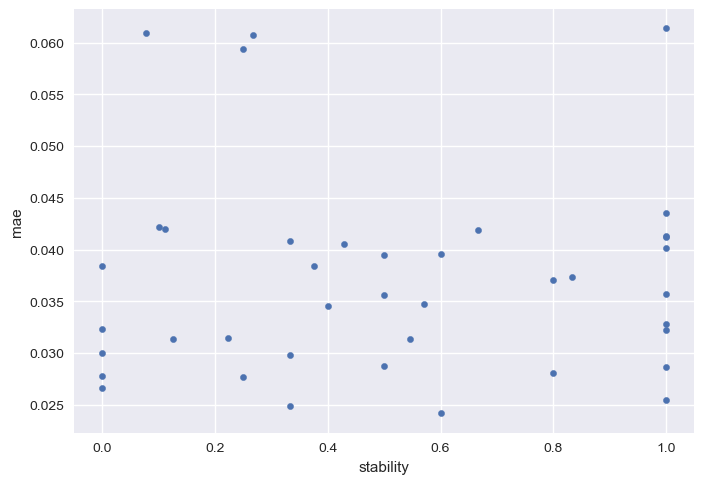

In [156]:
all_metrics_df.plot.scatter(y="mae", x="stability")

<Axes: xlabel='stability', ylabel='mae_2020'>

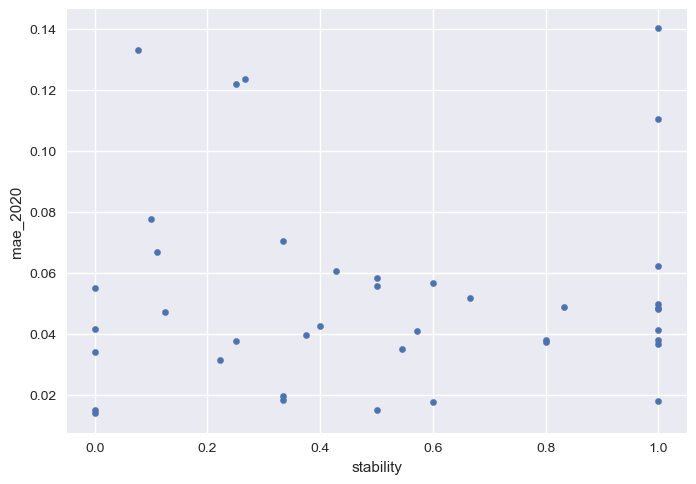

In [159]:
all_metrics_df.plot.scatter(y="mae_2020", x="stability")

<Axes: xlabel='stability', ylabel='mse'>

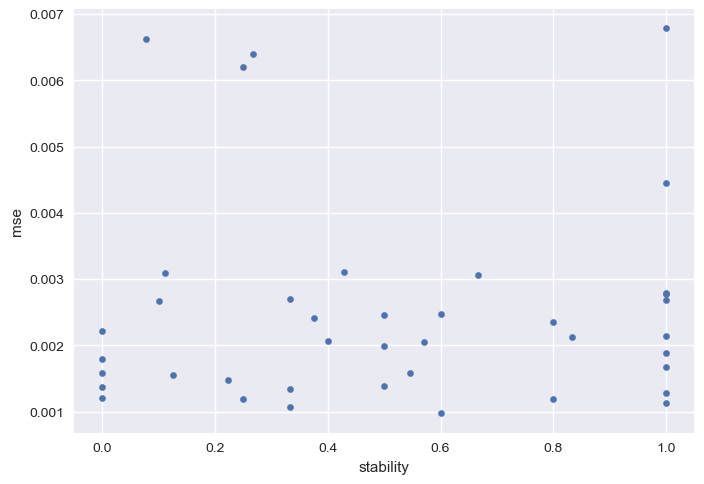

In [157]:
all_metrics_df.plot.scatter(y="mse", x="stability")

<Axes: xlabel='stability', ylabel='mse_2020'>

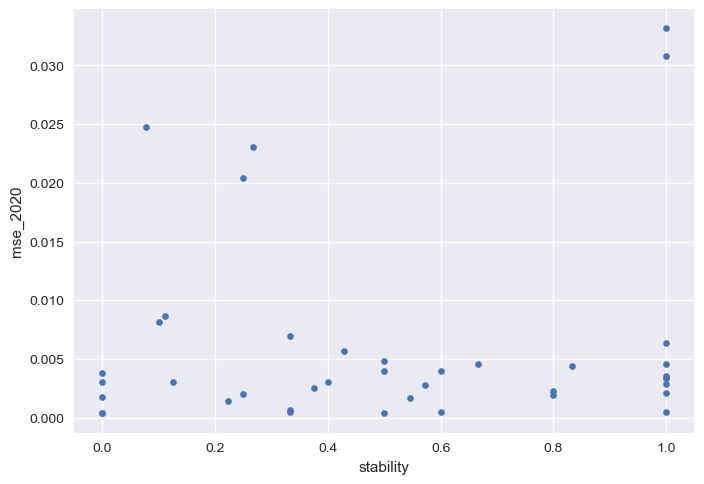

In [160]:
all_metrics_df.plot.scatter(y="mse_2020", x="stability")